In [1]:
pip install rarfile

In [2]:
import zipfile
import os
import rarfile

In [3]:
rar_path = "sensors_with_risk_2.rar"  # Change to uploaded file name
output_dir = "data"

try:
    with rarfile.RarFile(rar_path) as rf:
        rf.extractall(output_dir)
    print(f"Successfully extracted {rar_path} to {output_dir}")
except rarfile.Error as e:
    print(f"An error occurred: {e}")

Successfully extracted sensors_with_risk_2.rar to data


In [4]:
csv_file_path = "/content/data/sensors_with_risk_2.csv"

In [5]:
import pandas as pd
df = pd.read_csv(csv_file_path)

In [6]:
df.head()

,timestamp,uptimeNanos_lin,x_lin,y_lin,z_lin,uptimeNanos_acc,x_acc,y_acc,z_acc,uptimeNanos,...,z_gyro,start,finish,firstCollectionUptimeNanos,lastCollectionUptimeNanos,elapsedTimeNanos,smartphoneModel,androidVersion,acc_magnitude,risk_level
0,14/05/2016 10:54:33,11537817349260,0.085305,-0.322752,-0.106739,11537817349260,0.085305,-0.322752,9.69991,11537628641797,...,0.029619,2016-05-15 16:03:47.304-0300,2016-05-15 16:17:16.001-0300,11200022380290,12008698803207,808676422917,XT1058,5.1,9.705653,Intermediate
1,14/05/2016 10:54:33,11537817349260,0.085305,-0.322752,-0.106739,11537817349260,0.085305,-0.322752,9.69991,11537628641797,...,0.007163,2016-05-15 16:03:47.304-0300,2016-05-15 16:17:16.001-0300,11200022380290,12008698803207,808676422917,XT1058,5.1,9.705653,Intermediate
2,14/05/2016 10:54:33,11537817349260,0.085305,-0.322752,-0.106739,11537817349260,0.085305,-0.322752,9.69991,11537628641797,...,-0.007453,2016-05-15 16:03:47.304-0300,2016-05-15 16:17:16.001-0300,11200022380290,12008698803207,808676422917,XT1058,5.1,9.705653,Intermediate
3,14/05/2016 10:54:33,11537817349260,0.085305,-0.322752,-0.106739,11537817349260,0.085305,-0.322752,9.69991,11537746877720,...,0.029619,2016-05-15 16:03:47.304-0300,2016-05-15 16:17:16.001-0300,11200022380290,12008698803207,808676422917,XT1058,5.1,9.705653,Intermediate
4,14/05/2016 10:54:33,11537817349260,0.085305,-0.322752,-0.106739,11537817349260,0.085305,-0.322752,9.69991,11537746877720,...,0.007163,2016-05-15 16:03:47.304-0300,2016-05-15 16:17:16.001-0300,11200022380290,12008698803207,808676422917,XT1058,5.1,9.705653,Intermediate


In [7]:
df.isnull().sum()

,0
timestamp,0
uptimeNanos_lin,0
x_lin,0
y_lin,0
z_lin,0
uptimeNanos_acc,0
x_acc,0
y_acc,0
z_acc,0
uptimeNanos,0


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
features = ['x_acc','y_acc','z_acc','x_gyro','y_gyro','z_gyro','acc_magnitude']
X = df[features]
y = df['risk_level']

In [10]:
# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
# # Try Random Forest
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [14]:
# # Try Gradient Boosting
# gb = GradientBoostingClassifier(random_state=42)
# gb.fit(X_train, y_train)
# y_pred_gb = gb.predict(X_test)
# print("\nGradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

In [15]:
# Define Models
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        random_state=42,
        eval_metric='mlogloss',  # avoids warning
        use_label_encoder=False
    )
}

In [16]:
# Train & Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, target_names=le.classes_),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:36:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [17]:
# Print Results
for name, metrics in results.items():
    print(f"\n{name} Accuracy: {metrics['accuracy']:.4f}")
    print(metrics["classification_report"])
    print("Confusion Matrix:\n", metrics["confusion_matrix"])


Naive Bayes Accuracy: 0.9660
              precision    recall  f1-score   support

      Danger       0.61      0.97      0.75     33613
Intermediate       1.00      0.97      0.98    798645
        Safe       0.17      1.00      0.29      1298

    accuracy                           0.97    833556
   macro avg       0.59      0.98      0.67    833556
weighted avg       0.98      0.97      0.97    833556

Confusion Matrix:
 [[ 32647    966      0]
 [ 21092 771256   6297]
 [     0      0   1298]]

Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

      Danger       1.00      1.00      1.00     33613
Intermediate       1.00      1.00      1.00    798645
        Safe       1.00      1.00      1.00      1298

    accuracy                           1.00    833556
   macro avg       1.00      1.00      1.00    833556
weighted avg       1.00      1.00      1.00    833556

Confusion Matrix:
 [[ 33613      0      0]
 [     0 798645      0]
 [     0      0  

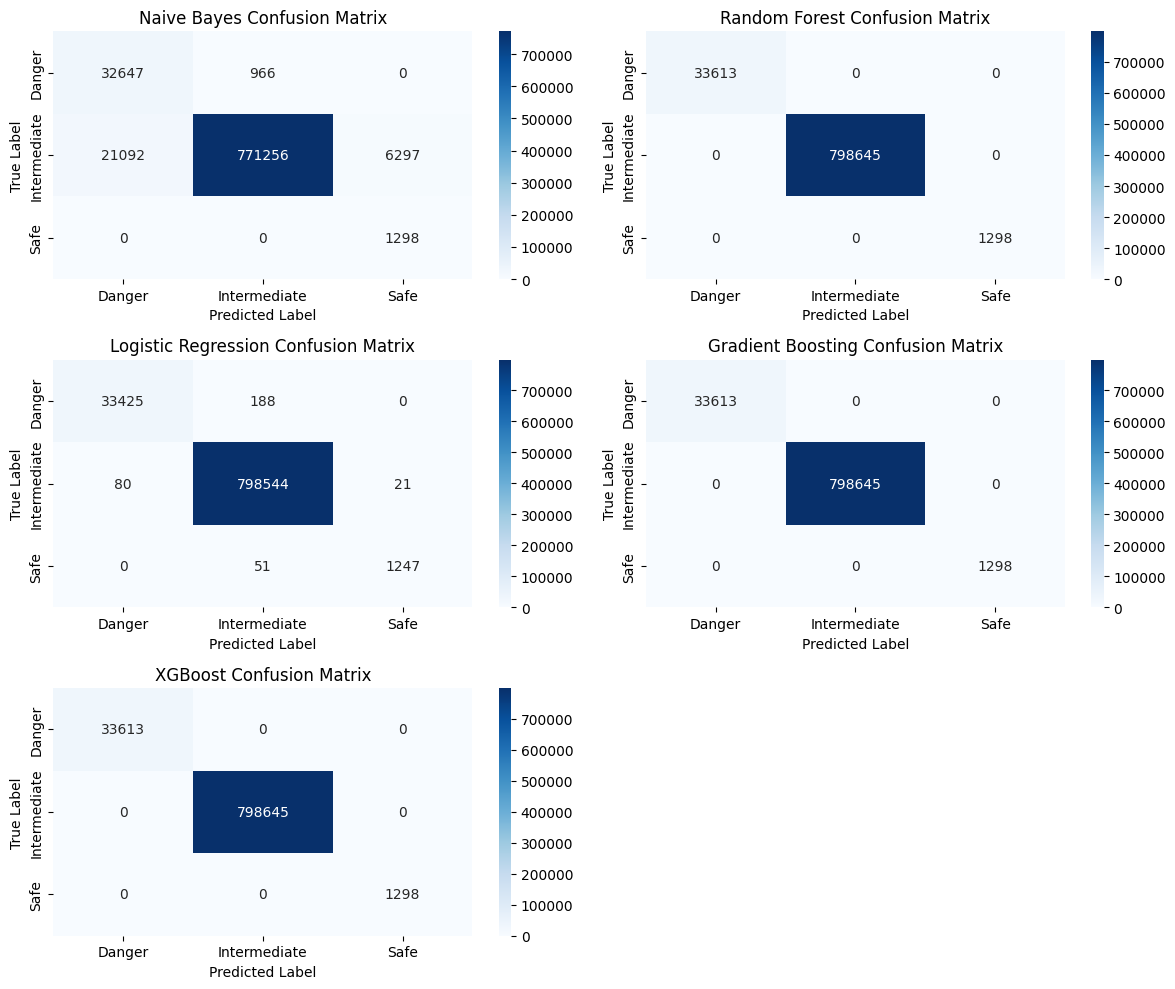

In [18]:
# Visualize Confusion Matrices
plt.figure(figsize=(12, 10))
for i, (name, metrics) in enumerate(results.items(), 1):
    plt.subplot(3, 2, i)  # adjust grid for extra model
    sns.heatmap(metrics["confusion_matrix"], annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

plt.tight_layout()
plt.show()

# The best one is of Naive Bayes